<a href="https://colab.research.google.com/github/antoreep-jana/YouTube_Code_Repositories/blob/main/Weekly%20Sessions/Weekly_Session__9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ResNet-50 TF Implementation

In [ ]:
import tensorflow as tf

In [ ]:
def conv_block(x, filters, strides = (2,2)):
  # (n - f + 2p)/s + 1

  filter1, filter2, filter3 = filters

  path1 = tf.keras.layers.Conv2D(filter1, (1,1),  strides = strides )(x)
  path1 = tf.keras.layers.BatchNormalization(axis = 3)(path1)
  path1 = tf.keras.layers.Activation('relu')(path1)

  path1 = tf.keras.layers.Conv2D(filter2, (3,3), padding = 'same')(path1)
  path1 = tf.keras.layers.BatchNormalization(axis = 3)(path1)
  path1 = tf.keras.layers.Activation('relu')(path1)

  path1 = tf.keras.layers.Conv2D(filter3, (1,1))(path1)
  path1 = tf.keras.layers.BatchNormalization(axis = 3)(path1)
  path1 = tf.keras.layers.Activation('relu')(path1)


  path2 = tf.keras.layers.Conv2D(filter3, (1,1), strides= strides)(x)
  path2 = tf.keras.layers.BatchNormalization(axis = 3)(path2)

  output = tf.keras.layers.add([path1, path2])
  output = tf.keras.layers.Activation('relu')(output)
  return output

In [ ]:
def identity_block(x, filters):

  filter1, filter2, filter3 = filters

  path1 = tf.keras.layers.Conv2D(filter1, (1,1) )(x)
  path1 = tf.keras.layers.BatchNormalization()(path1)
  path1 = tf.keras.layers.Activation('relu')(path1)

  path1 = tf.keras.layers.Conv2D(filter2, (3,3), padding = 'same')(path1)
  path1 = tf.keras.layers.BatchNormalization()(path1)
  path1 = tf.keras.layers.Activation('relu')(path1)

  path1 = tf.keras.layers.Conv2D(filter3, (1,1))(path1)
  path1 = tf.keras.layers.BatchNormalization()(path1)
  path1 = tf.keras.layers.Activation('relu')(path1)


  return tf.keras.layers.add([path1, x])

In [ ]:
inp = tf.keras.layers.Input(shape = (224,224,3))
x = tf.keras.layers.ZeroPadding2D((3,3))(inp)
x = tf.keras.layers.Conv2D(64, (7,7), strides = 2)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.ZeroPadding2D((1,1))(x)
x = tf.keras.layers.MaxPool2D((3,3), strides =2)(x)
#print(x.shape)

x = conv_block(x, [64, 64, 256], strides = (1,1))
x = identity_block(x, [64, 64, 256])
x = identity_block(x, [64, 64, 256])


x = conv_block(x, [128, 128, 512])
x = identity_block(x, [128, 128, 512])
x = identity_block(x, [128, 128, 512])
x = identity_block(x, [128, 128, 512])

x = conv_block(x, [256, 256, 1024])
x = identity_block(x, [256, 256, 1024])
x = identity_block(x, [256, 256, 1024])
x = identity_block(x, [256, 256, 1024])
x = identity_block(x, [256, 256, 1024])
x = identity_block(x, [256, 256, 1024])


x = conv_block(x, [512, 512, 2048])
x = identity_block(x, [512, 512, 2048])
x = identity_block(x, [512, 512, 2048])

x = tf.keras.layers.AveragePooling2D()(x)
x = tf.keras.layers.Dense(1000, activation = 'softmax')(x)





(None, 56, 56, 64)


In [ ]:

def ResNet50():
  inp = tf.keras.layers.Input(shape = (224,224,3))
  x = tf.keras.layers.ZeroPadding2D((3,3))(inp)
  x = tf.keras.layers.Conv2D(64, (7,7), strides = 2)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)

  x = tf.keras.layers.ZeroPadding2D((1,1))(x)
  x = tf.keras.layers.MaxPool2D((3,3), strides =2)(x)
  #print(x.shape)

  x = conv_block(x, [64, 64, 256], strides = (1,1))
  x = identity_block(x, [64, 64, 256])
  x = identity_block(x, [64, 64, 256])


  x = conv_block(x, [128, 128, 512])
  x = identity_block(x, [128, 128, 512])
  x = identity_block(x, [128, 128, 512])
  x = identity_block(x, [128, 128, 512])

  x = conv_block(x, [256, 256, 1024])
  x = identity_block(x, [256, 256, 1024])
  x = identity_block(x, [256, 256, 1024])
  x = identity_block(x, [256, 256, 1024])
  x = identity_block(x, [256, 256, 1024])
  x = identity_block(x, [256, 256, 1024])


  x = conv_block(x, [512, 512, 2048])
  x = identity_block(x, [512, 512, 2048])
  x = identity_block(x, [512, 512, 2048])

  x = tf.keras.layers.AveragePooling2D()(x)
  x = tf.keras.layers.Dense(1000, activation = 'softmax')(x)

  return tf.keras.models.Model(inputs = inp, outputs = x)





In [ ]:
model = ResNet50()

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_39 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_60 (ZeroPadding2 (None, 230, 230, 3)  0           input_39[0][0]                   
__________________________________________________________________________________________________
conv2d_474 (Conv2D)             (None, 112, 112, 64) 9472        zero_padding2d_60[0][0]          
__________________________________________________________________________________________________
batch_normalization_467 (BatchN (None, 112, 112, 64) 256         conv2d_474[0][0]                 
____________________________________________________________________________________________

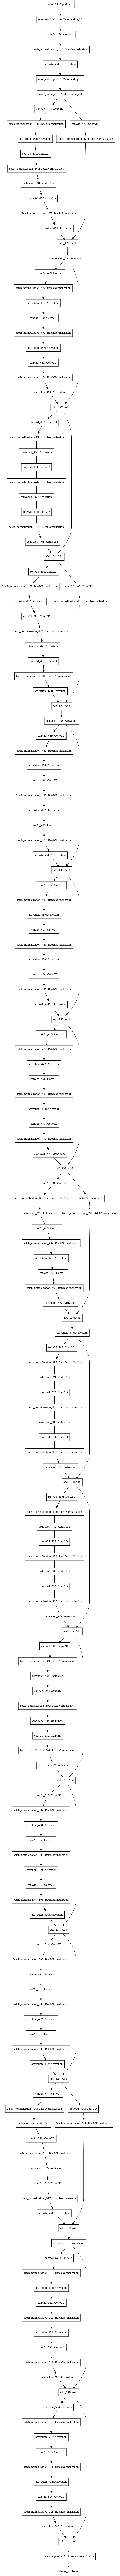

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)

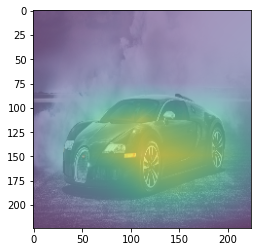

In [ ]:
img = cv2.imread('car.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))

fig, ax = plt.subplots()

ax.imshow(img,alpha = 0.5)
ax.imshow(cam, alpha = 0.5)
plt.show()

In [ ]:
def resnet50_cam_info(model):

  before_gap_layer = model.layers[-4]
  class_pred_layer = model.layers[-1]


  outputs = before_gap_layer.output, class_pred_layer.output 
  resnet50_cam_layers = tf.keras.models.Model(inputs = model.input, outputs =  outputs)
  
  class_weights = class_pred_layer.get_weights()[0]

  return resnet50_cam_layers, class_weights


resnet50_cam_layers, class_weights = resnet50_cam_info(model)
class_weights.shape

(2048, 1000)

In [ ]:
def create_cam(img, resnet50_cam_layers, class_weights, target_size):

  before_gap_output, prediction = resnet50_cam_layers.predict(img)

  predicted_class = np.argmax(prediction)
  dominate_class_weight = class_weights[:, predicted_class]

  before_gap_output = np.squeeze(before_gap_output).reshape((-1, 2048))
  cam = np.dot(before_gap_output, dominate_class_weight).reshape((7, 7))
  
  
  cam = zoom(cam, (32,32), order = 1)

  return cam

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


## GradCAM

In [ ]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras 

from IPython.display import Image, display 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 

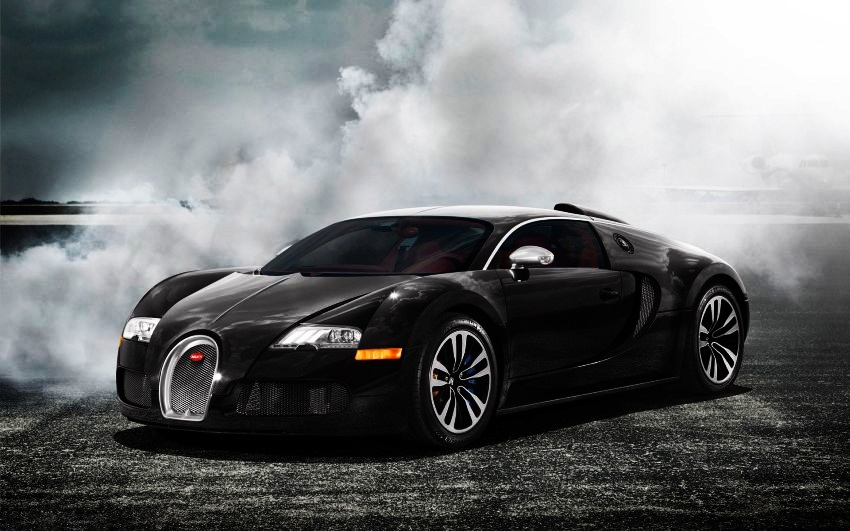

In [ ]:
model_builder = tf.keras.applications.xception.Xception
img_size = (299,299)

preprocess_input = tf.keras.applications.xception.preprocess_input 
decode_predictions = tf.keras.applications.xception.decode_predictions 

last_conv_layer_name = "block14_sepconv2_act"

img_path = tf.keras.utils.get_file('car.jpg', 'https://www.alux.com/wp-content/uploads/2014/12/2-Bugatti-Veyron-Best-Cars-For-Total-Poseurs-Top-10-Image-Source-hdcarwallpapers.com_.jpg')
display(Image(img_path))

#### Part1 (Implementing heatmaps)

In [ ]:
def img_array():
  pass

In [ ]:
# Obtain the grad model

model.layers[-1].activation = None 


grad_model = tf.keras.models.Model(inputs = model.input, outputs = [model.get_layer(last_conv_layer_name).output, model.output])



pred_index = None # refer to imagenet labels & mention the specific prediction index

# under gradient tape 
with tf.GradientTape() as tape:

  last_conv_layer_output, preds = grad_model(img_array)

  if pred_index is None:
    pred_index = np.argmax(preds[0])


  class_channel = preds[:, pred_index]


grads = tape.gradient(class_channel, last_conv_layer_output)


pooled_grads = tf.reduce_mean(grads, axis = (0,1,2))



heatmap = last_conv_layer_output[0] @ pooled_grads[:, np.newaxis]


heatmap = tf.squeeze(heatmap)

heatmap = tf.maximum(heatmap, 0)/tf.reduce_max(heatmap)

heatmap = heatmap.numpy()
# obtain the predictions using the grad model
# - layer prediction, overall prediction



# weights corresponding to the class index



#calculate gradients 


# mean intensity of the gradients 



#obtain heatmap by multiplication of the gradients with last_conv_output 


# normalize the heatmap 




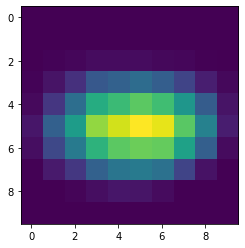

In [ ]:
plt.imshow(heatmap)

#### Part2 : Visualzing & Overlaying the heatmap obtained

In [ ]:
img.shape

(531, 850, 3)

In [ ]:
img1 = tf.keras.preprocessing.image.img_to_array(img)
img1 = preprocess_input(img1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


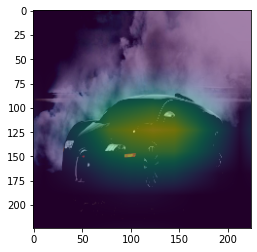

In [ ]:
from skimage.transform import resize


## Overlay the heatmap with the input image

heatmap_resize = resize(np.uint8(heatmap*255.0), (224,224), preserve_range = True)
img_resize = resize(img1, (224,224), preserve_range = True)
plt.imshow(img_resize)
plt.imshow(heatmap_resize, alpha  = 0.5)
plt.show()